In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('../data/raw/Mall_Customers.csv')
df = df.rename(columns={'Annual Income (k$)': 'Annual_Income_k$', 'Spending Score (1-100)': 'Spending_Score_1_100'})
df['Genre'] = df['Genre'].map({'Female': 1, 'Male': 0})
df.head()

,CustomerID,Genre,Age,Annual_Income_k$,Spending_Score_1_100
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   CustomerID            200 non-null    int64
 1   Genre                 200 non-null    int64
 2   Age                   200 non-null    int64
 3   Annual_Income_k$      200 non-null    int64
 4   Spending_Score_1_100  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [29]:
df.shape

(200, 5)

In [30]:
df.describe()

,CustomerID,Genre,Age,Annual_Income_k$,Spending_Score_1_100
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [31]:
df.isnull().sum()

CustomerID              0
Genre                   0
Age                     0
Annual_Income_k$        0
Spending_Score_1_100    0
dtype: int64

In [32]:
df['Genre'].value_counts()

Genre
1    112
0     88
Name: count, dtype: int64

/var/folders/f1/z0hz00wd47g2l6j1_vtwfdmw0000gn/T/ipykernel_75163/3290234523.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df, palette='pastel')


Text(0, 0.5, 'Count')

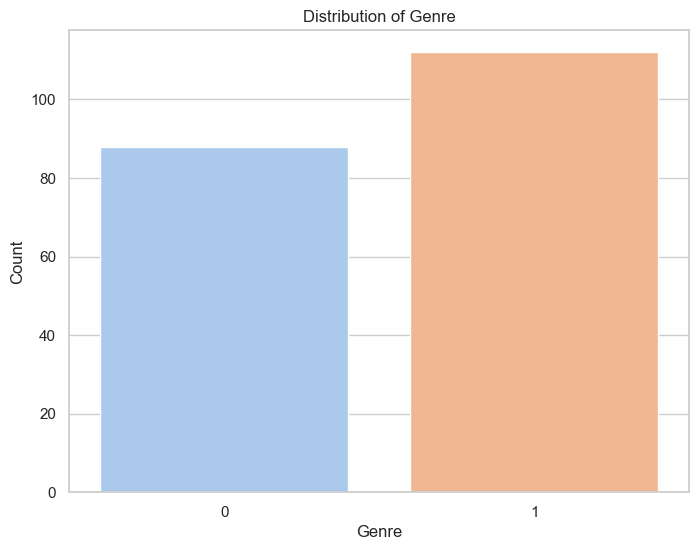

In [33]:
# check genre distribution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Genre', data=df, palette='pastel')
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Count')     

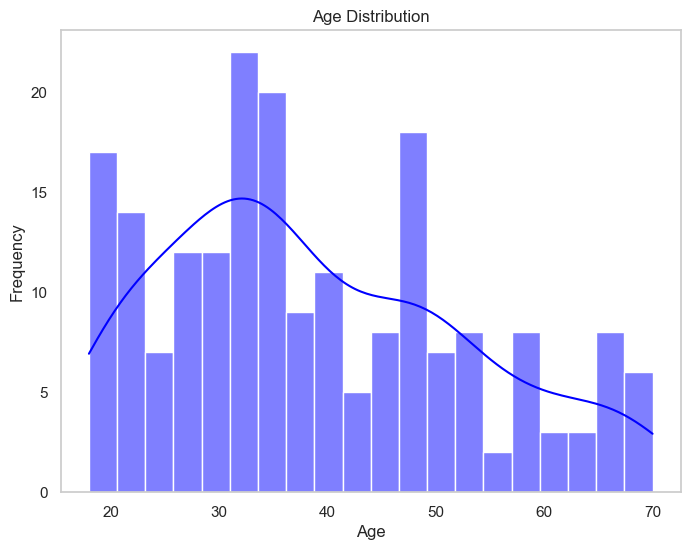

In [34]:
# histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

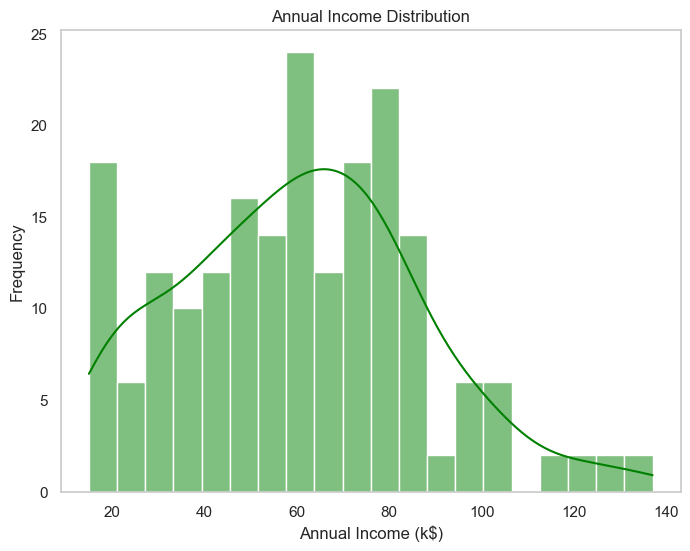

Text(0.5, 0, 'Spending Score (1-100)')

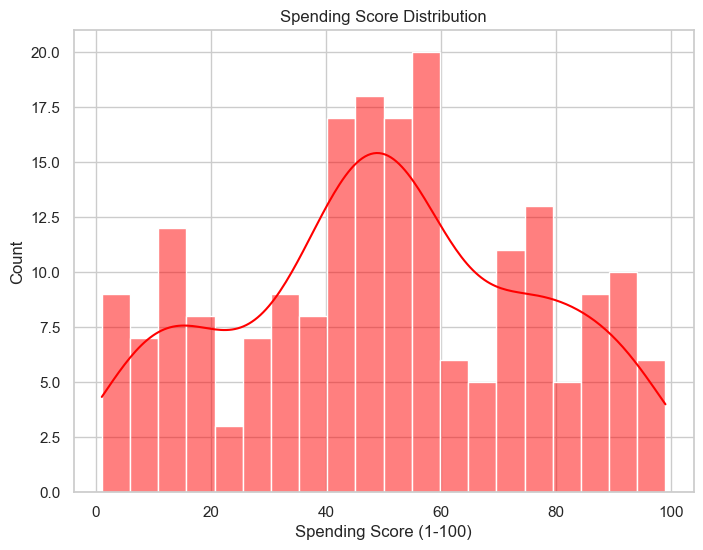

In [35]:
# histogram of Annual Income
plt.figure(figsize=(8, 6))
sns.histplot(df['Annual_Income_k$'], bins=20, kde=True, color='green')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.grid()
plt.show()
# histogram of Spending Score
plt.figure(figsize=(8, 6))
sns.histplot(df['Spending_Score_1_100'], bins=20, kde=True, color='red')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')      

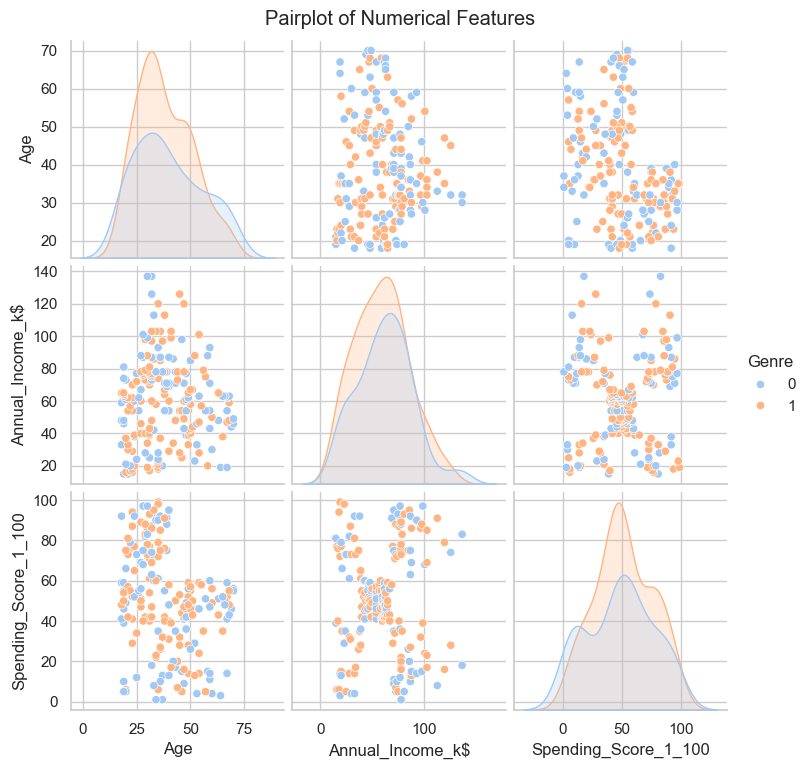

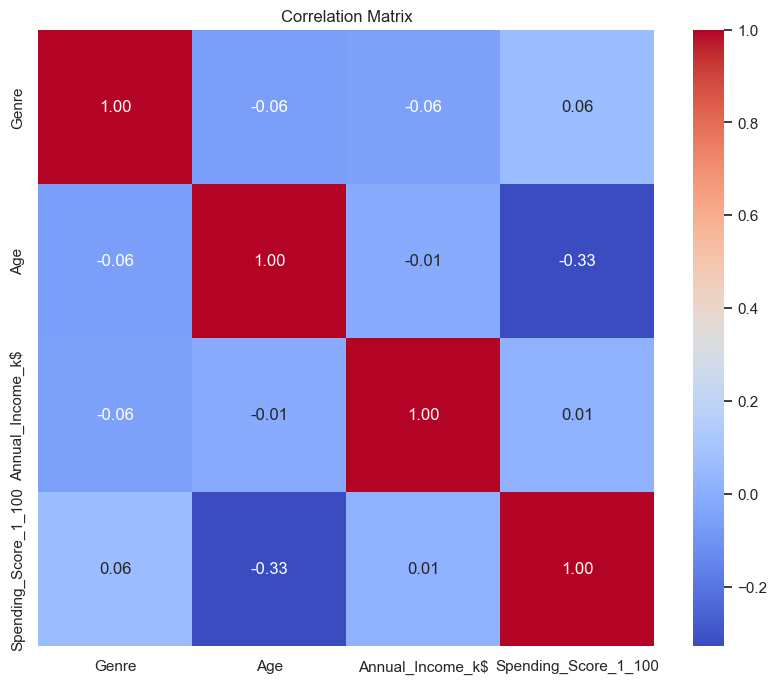

In [37]:
# interesting columns
columns_of_interest = ['Genre', 'Age', 'Annual_Income_k$', 'Spending_Score_1_100']
# pairplot for numerical features
sns.pairplot(df[columns_of_interest], hue='Genre', palette='pastel')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()
# correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[columns_of_interest].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()